In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [6]:
import yfinance as yf

data = yf.download('AAPL', start='2015-01-01', end='2024-01-01')
data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320431,24.789800,23.879980,24.778677,212818400
2015-01-05,23.635292,24.169172,23.448435,24.089090,257142000
2015-01-06,23.637510,23.897776,23.274916,23.699796,263188400
2015-01-07,23.968960,24.069062,23.735387,23.846612,160423600
2015-01-08,24.889904,24.947741,24.180289,24.298189,237458000


In [5]:
  !pip install yfinance


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     -------------------- ------------------- 1.6/3.0 MB 5.2 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 5.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139127 sha256=22bd62e4821ccdb7f6a9b6c2881c9028b94681ff6d38923af868c10738d5dba9
  Stored in directory: c:\users\aditya\appdata\local\pip\cache\wheels\43\ef\2d\2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [7]:
data['Return'] = data['Close'].pct_change()
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Target'] = np.where(data['Return'].shift(-1) > 0, 1, 0)

data = data.dropna()


In [8]:
features = ['Return', 'SMA_10', 'SMA_50']
X = data[features]
y = data['Target']

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


In [10]:
features = ['Return', 'SMA_10', 'SMA_50']
X = data[features]
y = data['Target']

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)




In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5259593679458239
              precision    recall  f1-score   support

           0       0.57      0.06      0.11       213
           1       0.52      0.96      0.68       230

    accuracy                           0.53       443
   macro avg       0.54      0.51      0.39       443
weighted avg       0.54      0.53      0.40       443



In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5259593679458239
              precision    recall  f1-score   support

           0       0.57      0.06      0.11       213
           1       0.52      0.96      0.68       230

    accuracy                           0.53       443
   macro avg       0.54      0.51      0.39       443
weighted avg       0.54      0.53      0.40       443



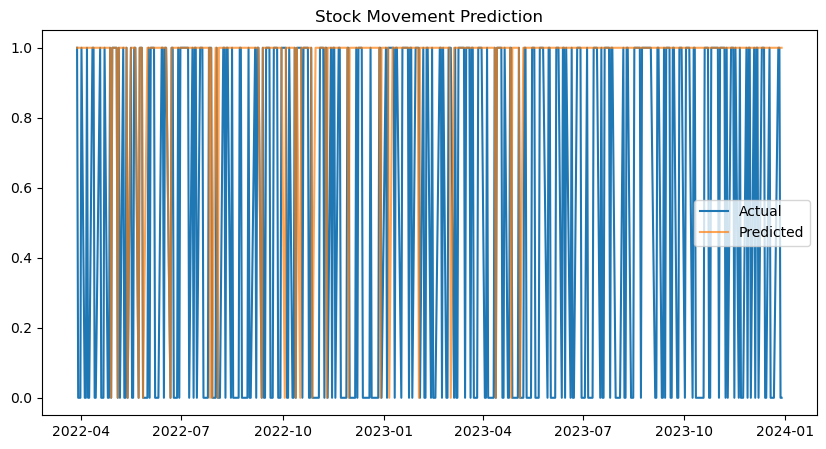

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(data.index[-len(y_test):], y_test, label='Actual')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title("Stock Movement Prediction")
plt.show()
